## Final Project Submission

Please fill out:
* Student name: **Joongsuk Jin**
* Student pace: **Part Time**
* Scheduled project review date/time: **3/12/2019**
* Instructor name: **Joe San Pietro**
* Blog post URL:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime
from sklearn import preprocessing



## Overview Plan


1. Exploratory Data Analysis - Data Visualization, Understanding Data

2. Clean Data - Null values, Duplicates values, Outlier values, Dummy Vairalbes, Data Types Change

3. Multi-colinearlity Analysis

4. Feature Normalization & Scaling - Check Ligression Analysis Assumptions (Linearlity, Normality)

5. Ordinary Least Square Modeling - Feature Selection

6. Recursive Feature Elimination

7. Test Multiple Multivariate Linear Regression models

8. Model Validation

9. Conclusion 


### 1. EDA


In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.shape

(21597, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB



#### Based on the initial look at the data. Followings are needed
#### - Data type
#### - Null value handling
#### - Outlier handling


### a. Data Type / Null Value Clean up
#### - Categorical Data Stored as Integers / float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
data['waterfront'] = data['waterfront'].astype('category',ordered=True)
data['view'] = data['view'].astype('category',ordered=True)
data['condition'] = data['condition'].astype('category',ordered=True)
data['grade'] = data['grade'].astype('category',ordered=False)
data['floors'] = data['floors'].astype('category',ordered=False)

data['zipcode'] = data['zipcode'].astype(str)
data['date'] = data['date'].astype('datetime64[ns]')



# yr_renovated can not be converted to int since there are null values. it will be converted to int after removing nulls

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\s

In [10]:
data['price'] = data['price'].astype('int') # in order to make the price whole number

#### - Null Value Clean up

In [11]:
data[pd.to_numeric(data['sqft_basement'], errors='coerce').isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,2014-12-05,189000,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,2014-07-07,861990,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,2015-03-23,720000,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,2014-09-16,272500,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,2014-11-21,740500,3,3.50,4380,6350,2.0,0.0,0.0,...,8,2780,?,1900,NaN,98117,47.6981,-122.368,1830,6350
217,1909600046,2014-07-03,445838,3,2.50,2250,5692,2.0,0.0,0.0,...,8,2250,?,2000,0.0,98146,47.5133,-122.379,1320,5390
309,3204800200,2015-01-08,665000,4,2.75,3320,10574,2.0,NaN,0.0,...,8,2220,?,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,2014-07-28,1350000,5,3.50,4800,14984,2.0,0.0,2.0,...,11,3480,?,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,2014-05-08,615000,2,1.00,1540,6872,1.0,0.0,0.0,...,7,820,?,1946,0.0,98119,47.6454,-122.373,1420,5538


#### - Identified values of "?" in *sqft_basement*

In [12]:
len(data[pd.to_numeric(data['sqft_basement'], errors='coerce').isnull()]) /len(data) * 100  # 2% seems small portion to drop

2.1021438162707784

In [13]:
data.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [14]:
data.sqft_basement.value_counts() # there are so many 0 values and ?. 
                                #We need to remove ? and create dummy variables to distinguish houses with basement without basement

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
2180.0        1
1135.0        1
946.0         1
1852.0        1
2310.0        1
1548.0        1
1880.0        1
2120.0        1
2810.0        1
2610.0        1
2720.0        1
2390.0        1
176.0         1
3000.0        1
4820.0        1
506.0         1
602.0         1
415.0         1
1245.0        1
2050.0        1
1798.0        1
143.0         1
2240.0        1
4130.0        1
1770.0        1
225.0         1
1816.0        1
1920.0        1
2600.0        1
1275.0        1
Name: sqft_basement, Len

In [15]:
data = data[pd.to_numeric(data['sqft_basement'], errors='coerce').notna()]

#### ? vlaues in *sqft_basement* columns are removed

In [16]:
data.sqft_basement = data.sqft_basement.astype(float).astype(int)

In [17]:
data.sqft_basement.dtype

dtype('int32')

In [18]:
data.sqft_basement.head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement, dtype: int32

#### - converted *sqft_basement* into integer

In [19]:
data.info() #Confirm all the variables data type is changed to 'category'
            #sqft_basement data type changed to 'int'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null datetime64[ns]
price            21143 non-null int32
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null category
waterfront       18804 non-null category
view             21082 non-null category
condition        21143 non-null category
grade            21143 non-null category
sqft_above       21143 non-null int64
sqft_basement    21143 non-null int32
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null object
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: category(5), datetime64[ns](1), float64(4), int32(2)

#### - Null values


In [20]:
from IPython.display import display
pd.options.display.max_columns = None

display(data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### There are 3 columns with null values  *watetfront, view, yr_renovated*
#### Let's investigate each column with null values. 

In [21]:
data.waterfront.value_counts()

0.0    18662
1.0      142
Name: waterfront, dtype: int64

In [22]:
len(data) - data.waterfront.count() #number of null values for waterfront

2339

#### 2376/21597 = 11% of data is a significant amount of data. So, we should lable 'NaN' as a one category

In [23]:
data['waterfront'].replace(np.NaN, 'NaN', inplace=True)

In [24]:
data.isna().sum() # check if "NaN" category is created (waterfront null value zero! yes)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Same process for *view* column

In [25]:
data.view.value_counts()

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [26]:
len(data) - data.view.count() #number of null vlaues 

61

#### 61 is 0.32% of the data. I would drop the rows as it is insignificant portion compare to the whole data set. 


In [27]:
data = data[pd.notnull(data['view'])]

In [28]:
data.isna().sum() # no more null values in view column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3742
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Same process for *yr_renovated*

In [29]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3742
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [30]:
 data.yr_renovated.value_counts() # there are 16961 values fro 0.0

0.0       16618
2014.0       69
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2009.0       21
2004.0       21
2006.0       20
1989.0       18
2002.0       17
1998.0       15
1999.0       15
2008.0       15
1983.0       15
1984.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1991.0       14
2010.0       14
1992.0       13
1994.0       13
2001.0       12
1997.0       12
1996.0       11
1995.0       11
          ...  
1968.0        6
1964.0        5
1975.0        5
1973.0        4
1965.0        4
1981.0        4
1969.0        4
1978.0        3
1963.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1972.0        3
1945.0        2
1962.0        2
1967.0        2
1974.0        2
1957.0        2
1940.0        2
1951.0        1
1948.0        1
1950.0        1
1976.0        1
1954.0        1
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Leng

#### It apprears that 0 value indicates houses without any renovation history, whereas, the values with year information indicate that the houses are renovated. 

#### This raises a question. Although there is not null values. How do we know if the values are legit? what if weired random values are entered? or outliers messing up the distribution etc
#### We can graph the plots with each columns to investigate

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update 

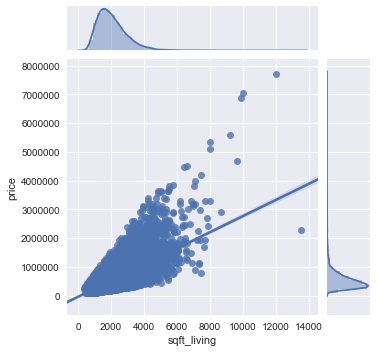

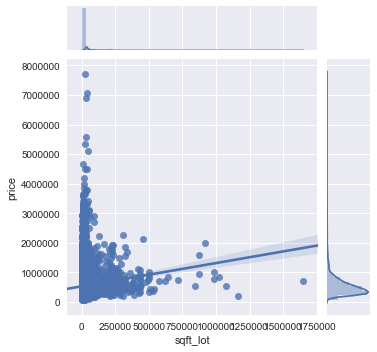

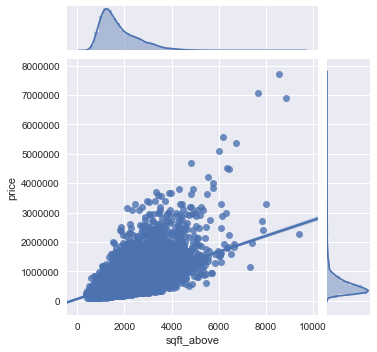

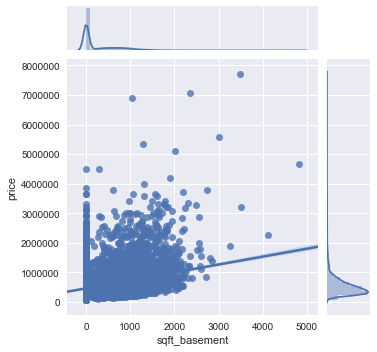

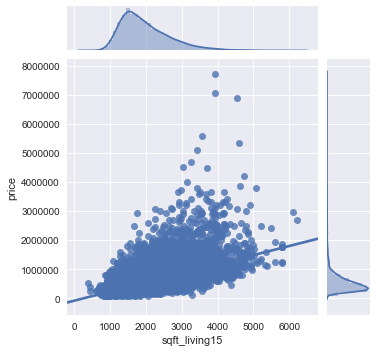

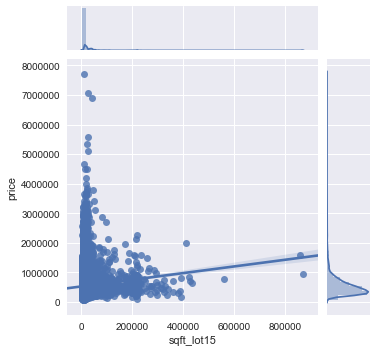

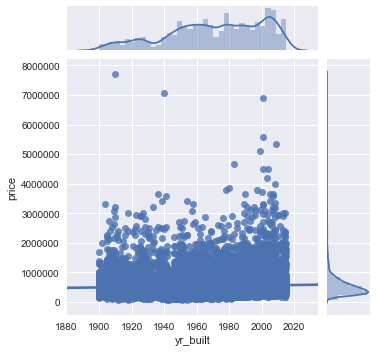

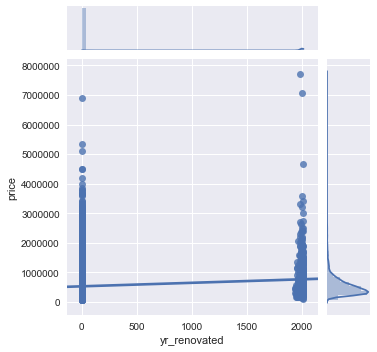

In [31]:
# without discrete variables and Lat, Long variables
sns.jointplot(x="sqft_living", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_above", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_basement", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_living15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_built", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_renovated", y="price", data=data, kind = 'reg', size = 5)
plt.show();

#### While most of the grpahs show linear relationships, 
#### *sqft_lot, sqft_lot15 and yr_built, and yr_renovated*  seem to be poorly related to price.
#### We can see that there is a lot of zeros in the sqft_basement distribution (i.e., no basement). Similarly, there is a lot of zeros in the yr_renovated variable. Let's first take care of the two variables, using dummy variables

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


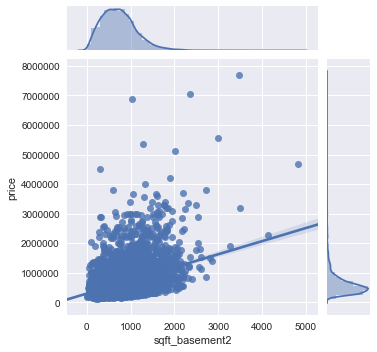

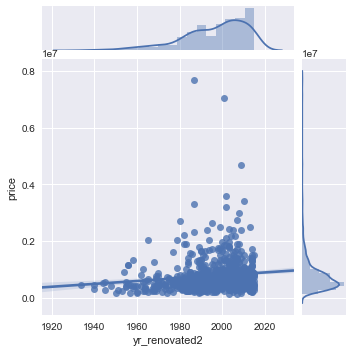

In [32]:
# Create 2 new columns for the analysis. Basically without zeros.
data['sqft_basement2'] = data['sqft_basement'].apply(lambda x: x if x > 0 else None)
data['yr_renovated2'] = data['yr_renovated'].apply(lambda x: x if x > 0 else None)

# Show the new plots with paerson correlation
sns.jointplot(x="sqft_basement2", y="price", data=data, kind = 'reg', dropna=True, size = 5)
sns.jointplot(x="yr_renovated2", y="price", data=data, kind = 'reg', dropna=True, size = 5)
plt.show()

#### It looks a lot better! They seem to be more correlated. Now I am going to create dummy columns.

### One-hot encodng categorical columns

In [33]:
# For analysis purpose, create additional columns indicating if a house has basement or if a house has been renovated.

data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data['basement_present'] = data['basement_present'].astype('category', ordered = False)

data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data['renovated'] = data['renovated'].astype('category', ordered = False)

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  import sys


In [34]:
data.isna().sum() 

id                      0
date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated         3742
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
sqft_basement2      12798
yr_renovated2       20360
basement_present        0
renovated               0
dtype: int64

### 3. Checking for Multicollineartiy

In [35]:
# id, date column seems unnecessary

data.drop(['id'],axis=1, inplace=True)

In [36]:
# drop date column
data.drop(['date'], axis=1, inplace=True)

In [37]:
# drop long and lat columns, Zipcode can provide enough location information
data.drop(['long', 'lat'], axis=1, inplace=True)

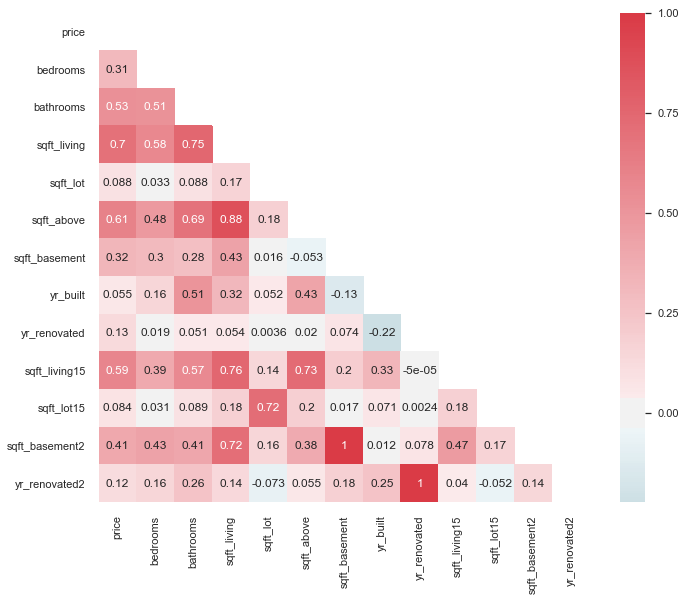

In [38]:
sns.set(style= "white")
corr = data.corr() # create a covariance matrix

#Generate a mask the esize fo our covariance matrix
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up the matplotlib fig
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True)



#### Upon observation, there are variables higly correlated
#### 1. sqft_above & sqft_living
#### 2. sqft_living15 & sqft_living
#### 3. sqft_lot15 & sqft_lot
#### 4. bathrooms & sq_living

#### drop *sqft_above*, *sqft_living15*, *sqft_lot15*, *bathrooms* ? We will proceed with distribution analysis and OLS and decdie with more evidence

### 4. Normalization & Feature Scaling 

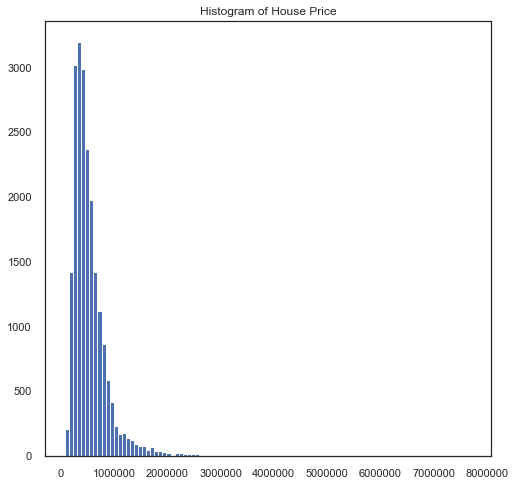

In [39]:
# firstly, Price (dependent varaible needs to be scaled)
plt.figure(figsize=(8,8))
plt.hist(data.price,bins=100,color='b')
plt.title('Histogram of House Price')
plt.show()

#Extremly screwed & scale spectrum is too broad -> log scale needed

In [40]:
data['log_price'] = np.log(data['price'])


In [41]:
data.log_price

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
5        14.022525
8        12.343658
9        12.685408
10       13.403776
11       13.056224
12       12.644328
13       12.899220
14       13.180632
15       13.384728
16       12.886641
17       13.091904
19       12.345835
20       12.860999
21       14.508658
22       12.560244
23       12.439958
24       12.703813
25       12.358794
26       13.750439
27       13.410545
28       12.989974
29       13.485617
30       13.271645
31       12.542545
32       13.440817
           ...    
21565    13.345507
21566    13.102161
21567    12.899095
21568    12.847927
21569    12.506177
21570    13.132314
21571    12.860999
21572    12.934828
21573    12.758520
21574    14.014361
21575    13.256894
21576    13.071070
21577    13.901688
21578    12.765688
21579    13.161584
21580    13.429775
21582    13.202652
21583    13.604790
21584    14.247293
21585    13.054085
21586    12.319401
21587    13.

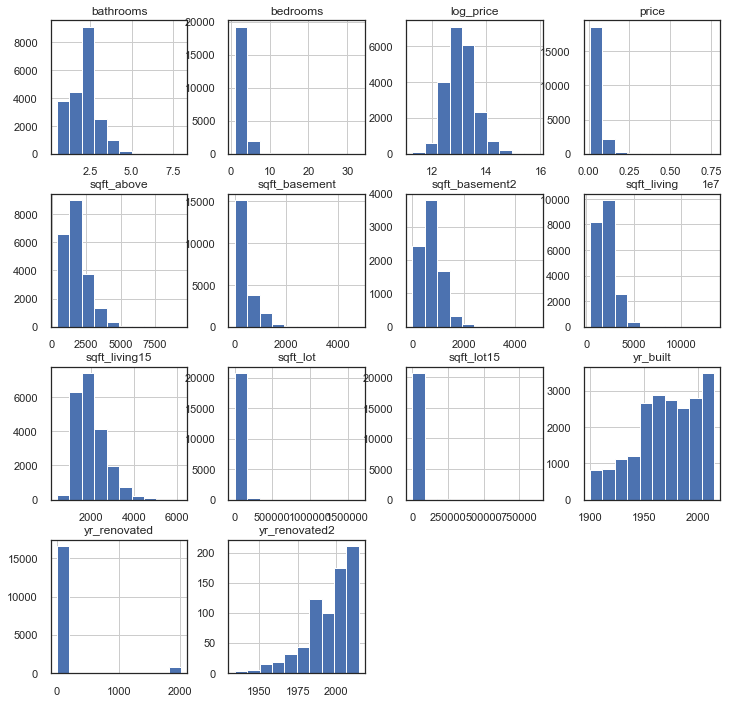

In [42]:
data.hist(figsize=[12,12]); 

# variable like bedrooms is very skewed. We need to perfrom outliers analysis

# Price is the depenent variable so on need for outlier analysis
#sqft_above,sqft_living15, sqft_lot15 are potential candidates for drop (multicolinearlity)

#sqft_basement is replaced by sqft_basement2
#yr_renovated is replaced by  yr_renovated2

#Therefore, perfrom outlier analysis on bedrooms

In [43]:
# Outlier analysis on bedrooms

from scipy.stats import zscore

data["bedrooms_zscore"] = zscore(data["bedrooms"])
data['is_outlier'] = data['bedrooms_zscore'].apply(lambda x: x<=-3 or x>=3)

data[data['is_outlier']]  # bedrooms outlier (more than 6 bedrooms). 
                          #Please refer to the "bedrooms_zscore" and "is_outlier" colums

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sqft_basement2,yr_renovated2,basement_present,renovated,log_price,bedrooms_zscore,is_outlier
556,1950000,7,3.50,4640,15235,2.0,NaN,1.0,3,11,2860,1780,1965,2003.0,98040,3230,20697,1780.0,2003.0,1,1,14.483340,3.921838,True
1134,420000,7,3.00,2940,8624,1.0,0,0.0,3,8,1690,1250,1977,NaN,98155,1850,8031,1250.0,NaN,1,0,12.948010,3.921838,True
1239,350000,7,3.00,2800,9569,1.0,0,2.0,3,7,1400,1400,1963,0.0,98056,2150,7333,1400.0,NaN,1,0,12.765688,3.921838,True
1658,490000,8,5.00,2800,2580,2.0,0,0.0,3,8,1880,920,1997,0.0,98122,1800,2580,920.0,NaN,1,0,13.102161,5.002949,True
3717,884900,7,4.75,5370,10800,1.5,0,0.0,3,8,5370,0,1967,0.0,98040,2310,10910,NaN,NaN,0,0,13.693230,3.921838,True
4020,800000,7,6.75,7480,41664,2.0,0,2.0,3,11,5080,2400,1953,NaN,98166,2810,33190,2400.0,NaN,1,0,13.592367,3.921838,True
4031,2150000,8,6.00,4340,9415,2.0,0,0.0,3,8,4340,0,1967,0.0,98004,2050,9100,NaN,NaN,0,0,14.580978,5.002949,True
4063,373000,8,3.00,2850,12714,1.0,NaN,0.0,3,7,2850,0,1959,0.0,98055,1480,4942,NaN,NaN,0,0,12.829334,5.002949,True
4092,599999,9,4.50,3830,6988,2.5,0,0.0,3,7,2450,1380,1938,0.0,98103,1460,6291,1380.0,NaN,1,0,13.304683,6.084061,True
4231,700000,9,3.00,3680,4400,2.0,0,0.0,3,7,2830,850,1908,0.0,98102,1960,2450,850.0,NaN,1,0,13.458836,6.084061,True


In [44]:
data = data[~data['is_outlier']]
data.drop(['is_outlier', 'bedrooms_zscore'], axis=1, inplace=True)

In [45]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sqft_basement2,yr_renovated2,basement_present,renovated,log_price
0,221900,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0,1955,0.0,98178,1340,5650,NaN,NaN,0,0,12.309982
1,538000,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,400,1951,1991.0,98125,1690,7639,400.0,1991.0,1,1,13.195614
2,180000,2,1.00,770,10000,1.0,0,0.0,3,6,770,0,1933,NaN,98028,2720,8062,NaN,NaN,0,0,12.100712
3,604000,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,910,1965,0.0,98136,1360,5000,910.0,NaN,1,0,13.311329
4,510000,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,0,1987,0.0,98074,1800,7503,NaN,NaN,0,0,13.142166


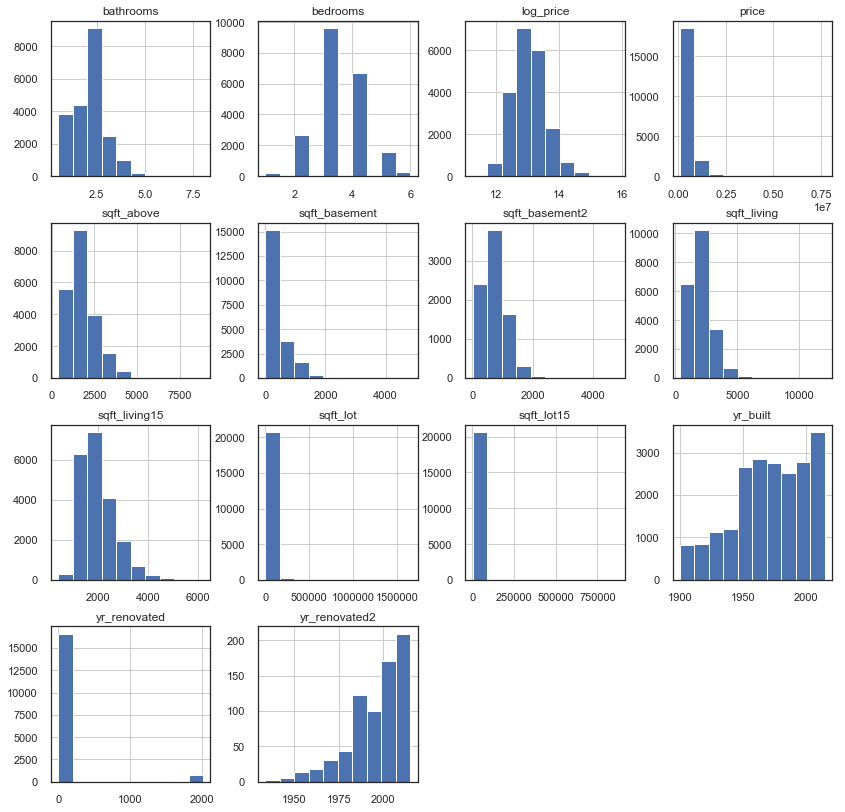

In [46]:
data.hist(figsize=[14,14]); # try histogram again to see change in distribution 


In [47]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'sqft_basement2', 'yr_renovated2', 'basement_present',
       'renovated', 'log_price'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21022 entries, 0 to 21596
Data columns (total 22 columns):
price               21022 non-null int32
bedrooms            21022 non-null int64
bathrooms           21022 non-null float64
sqft_living         21022 non-null int64
sqft_lot            21022 non-null int64
floors              21022 non-null category
waterfront          21022 non-null object
view                21022 non-null category
condition           21022 non-null category
grade               21022 non-null category
sqft_above          21022 non-null int64
sqft_basement       21022 non-null int32
yr_built            21022 non-null int64
yr_renovated        17293 non-null float64
zipcode             21022 non-null object
sqft_living15       21022 non-null int64
sqft_lot15          21022 non-null int64
sqft_basement2      8243 non-null float64
yr_renovated2       716 non-null float64
basement_present    21022 non-null category
renovated           21022 non-null category
log_p

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensiona

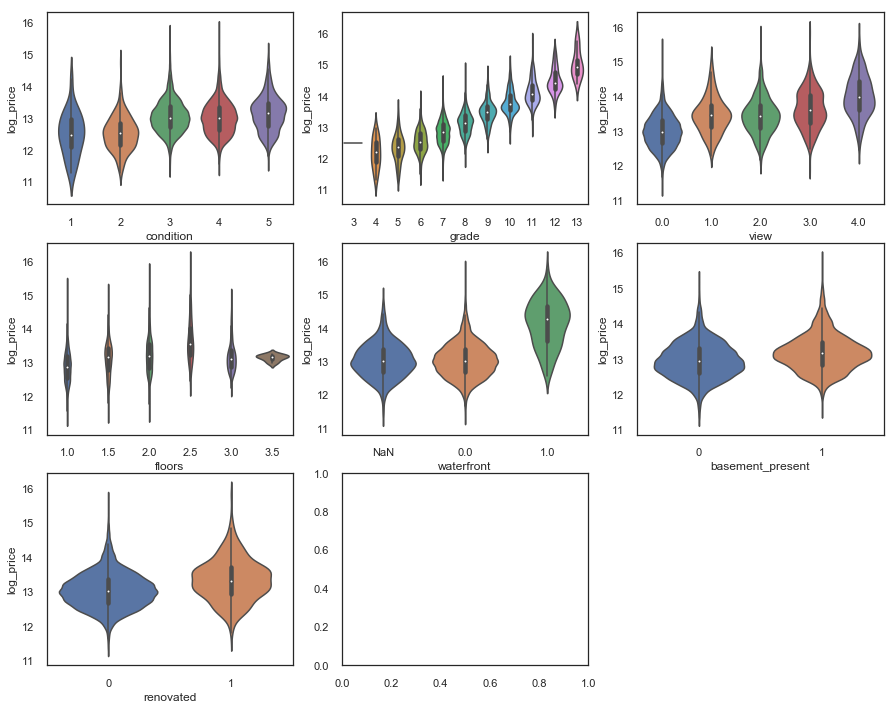

In [49]:
# Missing variables from the histograms are floors, waterfront, view, condition, grade, zipcode (non-continuous variables)
# basement_present and renovated are dummy variables


fig = plt.figure(figsize=(15,12))
 
fig.add_subplot(3,3,1)
sns.violinplot(x="condition", y="log_price", data=data)  
fig.add_subplot(3,3,2)
sns.violinplot(x="grade", y="log_price", data=data)   
fig.add_subplot(3,3,3)
sns.violinplot(x="view", y="log_price", data=data)  
fig.add_subplot(3,3,4)
sns.violinplot(x="floors", y="log_price", data=data)  
fig.add_subplot(3,3,5)
sns.violinplot(x="waterfront", y="log_price", data=data)  
fig.add_subplot(3,3,6)
sns.violinplot(x="basement_present", y="log_price", data=data)  
fig.add_subplot(3,3,7)
sns.violinplot(x="renovated", y="log_price", data=data)  
fig.add_subplot(3,3,8)

#### waterfront, grade, view, condition show positive relationship to log price
#### renovated and basement_present also shows slight positive relationsip. 
#### Further analysis is requried to tell the significance of the relationships


#### Next, we need scaling of the other variables. (continuouts)

In [50]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'sqft_basement2', 'yr_renovated2', 'basement_present',
       'renovated', 'log_price'],
      dtype='object')

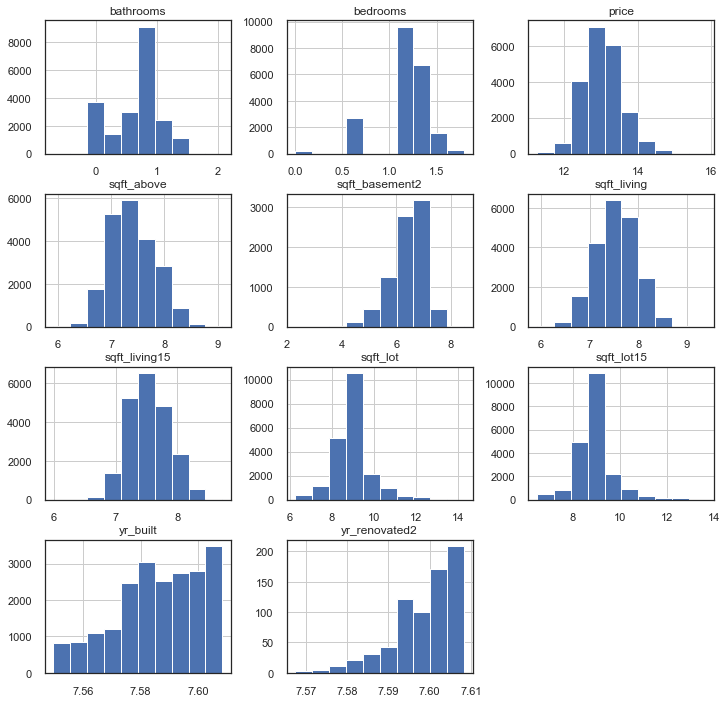

In [51]:
data_log = pd.DataFrame([])

data_log['bedrooms'] = np.log(data['bedrooms'])
data_log['bathrooms'] = np.log(data['bathrooms'])


data_log['sqft_lot'] = np.log(data['sqft_lot'])
data_log['sqft_above'] = np.log(data['sqft_above'])
data_log['sqft_basement2'] = np.log(data['sqft_basement2'])
data_log['sqft_living'] = np.log(data['sqft_living'])
data_log['sqft_living15'] = np.log(data['sqft_living15'])
data_log['sqft_lot'] = np.log(data['sqft_lot'])
data_log['sqft_lot15'] = np.log(data['sqft_lot15'])

data_log['price'] = np.log(data['price'])

data_log['yr_built'] = np.log(data['yr_built'])
data_log['yr_renovated2'] = np.log(data['yr_renovated2'])

data_log.hist(figsize=[12,12]);

# Confirmed that the variables are a lot more normally distributed

#### Create dummy variables for the rest of the categorical variables and add them to data_log

In [52]:
categorial_cols = ['floors', 'view', 'condition', 'grade']

for cc in categorial_cols:
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}".format(cc))
    data_log = data_log.join(dummies)

In [53]:
data_log.info() # great! new data set to do OLS

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21022 entries, 0 to 21596
Data columns (total 38 columns):
bedrooms          21022 non-null float64
bathrooms         21022 non-null float64
sqft_lot          21022 non-null float64
sqft_above        21022 non-null float64
sqft_basement2    8243 non-null float64
sqft_living       21022 non-null float64
sqft_living15     21022 non-null float64
sqft_lot15        21022 non-null float64
price             21022 non-null float64
yr_built          21022 non-null float64
yr_renovated2     716 non-null float64
floors1.0         21022 non-null uint8
floors1.5         21022 non-null uint8
floors2.0         21022 non-null uint8
floors2.5         21022 non-null uint8
floors3.0         21022 non-null uint8
floors3.5         21022 non-null uint8
view0.0           21022 non-null uint8
view1.0           21022 non-null uint8
view2.0           21022 non-null uint8
view3.0           21022 non-null uint8
view4.0           21022 non-null uint8
condition1    

#### We saw that zipcodes are also related to price. 
#### However, encoded all zipcodes will add 70 dummies variables. 
#### Instead, we will only encode the 6 most expensive zipcodes. 



In [54]:
zipcode_data = data.groupby('zipcode').aggregate(np.mean)
zipcode_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_basement2,yr_renovated2,log_price
zipcode,,,,,,,,,,,,,,
98001,2.814788e+05,3.401709,2.022080,1910.814815,14845.814815,1728.678063,182.136752,1981.173789,28.851449,1831.475783,11237.170940,752.117647,1990.750000,12.495672
98002,2.345127e+05,3.333333,1.843434,1629.904040,7505.853535,1524.166667,105.737374,1968.010101,60.579268,1481.146465,7598.060606,675.354839,1987.000000,12.338653
98003,2.949962e+05,3.336996,2.043040,1928.029304,10629.216117,1662.267399,265.761905,1976.864469,16.923729,1874.589744,9777.366300,740.336735,1997.000000,12.542263
98004,1.353591e+06,3.803226,2.502419,2893.451613,13142.964516,2414.000000,479.451613,1971.158065,218.769531,2676.451613,12792.329032,1032.152778,2000.178571,14.005738
98005,8.102914e+05,3.838323,2.422156,2648.940120,19991.233533,2160.077844,488.862275,1969.742515,58.408759,2568.329341,18419.227545,949.302326,2000.500000,13.559934
98006,8.574607e+05,3.819302,2.545688,2869.858316,13342.260780,2289.201232,580.657084,1978.609856,79.897756,2785.595483,12120.903491,1075.209125,2002.437500,13.560464
98007,6.140060e+05,3.750000,2.150735,2167.573529,10542.088235,1866.544118,301.029412,1971.102941,35.398230,2125.147059,9605.595588,909.777778,2000.000000,13.281690
98008,6.469884e+05,3.730216,2.093525,2136.348921,10124.625899,1708.935252,427.413669,1966.384892,59.897436,2016.223022,9499.615108,893.390977,2002.285714,13.279396
98010,4.214449e+05,3.285714,2.017857,2125.704082,55983.479592,1991.571429,134.132653,1978.867347,247.962500,1998.632653,47447.795918,730.277778,1983.700000,12.846118


In [55]:
zipcode_data = data.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace=True)

data['count'] = 1
count_houses_zipcode = data.groupby('zipcode').sum()
count_houses_zipcode.reset_index(inplace=True)
count_houses_zipcode = count_houses_zipcode[['zipcode','count']]
data.drop(['count'], axis = 1, inplace = True)

zipcode_data = pd.merge(zipcode_data, count_houses_zipcode, how='left', on=['zipcode'])
zipcode_data = pd.DataFrame(zipcode_data)
zipcode_data = zipcode_data.sort_values('price',ascending= False)
zipcode_data.head(10)

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_basement2,yr_renovated2,log_price,count
24,98039,2.129062e+06,3.979167,3.140625,3748.437500,17221.895833,3217.187500,531.250000,1971.250000,472.000000,3129.375000,17350.375000,1214.285714,1992.888889,14.453349,48
3,98004,1.353591e+06,3.803226,2.502419,2893.451613,13142.964516,2414.000000,479.451613,1971.158065,218.769531,2676.451613,12792.329032,1032.152778,2000.178571,14.005738,310
25,98040,1.184380e+06,4.011029,2.700368,3090.430147,13700.911765,2465.408088,625.022059,1971.408088,239.922747,2898.919118,12748.985294,1140.979866,1996.500000,13.900236,272
48,98112,1.081634e+06,3.453125,2.371094,2471.687500,4911.265625,1979.460938,492.226562,1945.347656,185.175926,2264.027344,4861.187500,732.616279,1999.900000,13.772555,256
41,98102,9.057596e+05,3.151515,2.287879,2138.575758,3606.636364,1743.373737,395.202020,1953.050505,82.638889,1958.030303,3319.505051,601.923077,1983.333333,13.561080,99
43,98105,8.645453e+05,3.429224,2.122146,2125.031963,5170.223744,1681.561644,443.470320,1941.095890,145.921348,2029.748858,4984.200913,660.680272,1998.000000,13.558110,219
53,98119,8.614803e+05,3.284091,2.223011,2008.482955,3642.801136,1599.732955,408.750000,1946.068182,223.468531,1871.704545,3758.727273,599.500000,1997.250000,13.573508,176
5,98006,8.574607e+05,3.819302,2.545688,2869.858316,13342.260780,2289.201232,580.657084,1978.609856,79.897756,2785.595483,12120.903491,1075.209125,2002.437500,13.560464,487
47,98109,8.546488e+05,3.153846,2.129808,2009.336538,3613.788462,1607.028846,402.307692,1943.644231,165.117647,1927.596154,3629.105769,643.692308,2005.000000,13.567434,104
4,98005,8.102914e+05,3.838323,2.422156,2648.940120,19991.233533,2160.077844,488.862275,1969.742515,58.408759,2568.329341,18419.227545,949.302326,2000.500000,13.559934,167


In [56]:
  zipcode_data[['price', 'zipcode']].head(6) # top 6 zipcodes

,price,zipcode
24,2.129062e+06,98039
3,1.353591e+06,98004
25,1.184380e+06,98040
48,1.081634e+06,98112
41,9.057596e+05,98102
43,8.645453e+05,98105


In [57]:
dummies_zipcodes = pd.get_dummies(data['zipcode'], drop_first=False)
dummies_zipcodes.reset_index(inplace=True)
dummies_zipcodes = dummies_zipcodes.add_prefix("{}".format('zipcode'))
dummies_zipcodes = dummies_zipcodes[['zipcode98039','zipcode98004','zipcode98040','zipcode98112','zipcode98109','zipcode98006']]
data_log = data_log.join(dummies_zipcodes)

data_log.dtypes

# included top 6 zipcodes to the dataframe

bedrooms          float64
bathrooms         float64
sqft_lot          float64
sqft_above        float64
sqft_basement2    float64
sqft_living       float64
sqft_living15     float64
sqft_lot15        float64
price             float64
yr_built          float64
yr_renovated2     float64
floors1.0           uint8
floors1.5           uint8
floors2.0           uint8
floors2.5           uint8
floors3.0           uint8
floors3.5           uint8
view0.0             uint8
view1.0             uint8
view2.0             uint8
view3.0             uint8
view4.0             uint8
condition1          uint8
condition2          uint8
condition3          uint8
condition4          uint8
condition5          uint8
grade3              uint8
grade4              uint8
grade5              uint8
grade6              uint8
grade7              uint8
grade8              uint8
grade9              uint8
grade10             uint8
grade11             uint8
grade12             uint8
grade13             uint8
zipcode98039

### 5. Ordinary Least Square Modeling - Feature Selection


In [58]:
import statsmodels.formula.api as smf

#### create a loop that runs a simple OLS regression between continuous independent and dependent variables

In [59]:
data_log.describe().columns.drop(['price'])

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_basement2',
       'sqft_living', 'sqft_living15', 'sqft_lot15', 'yr_built',
       'yr_renovated2', 'floors1.0', 'floors1.5', 'floors2.0', 'floors2.5',
       'floors3.0', 'floors3.5', 'view0.0', 'view1.0', 'view2.0', 'view3.0',
       'view4.0', 'condition1', 'condition2', 'condition3', 'condition4',
       'condition5', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7',
       'grade8', 'grade9', 'grade10', 'grade11', 'grade12', 'grade13',
       'zipcode98039', 'zipcode98004', 'zipcode98040', 'zipcode98112',
       'zipcode98109', 'zipcode98006'],
      dtype='object')

In [60]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21022 entries, 0 to 21596
Data columns (total 44 columns):
bedrooms          21022 non-null float64
bathrooms         21022 non-null float64
sqft_lot          21022 non-null float64
sqft_above        21022 non-null float64
sqft_basement2    8243 non-null float64
sqft_living       21022 non-null float64
sqft_living15     21022 non-null float64
sqft_lot15        21022 non-null float64
price             21022 non-null float64
yr_built          21022 non-null float64
yr_renovated2     716 non-null float64
floors1.0         21022 non-null uint8
floors1.5         21022 non-null uint8
floors2.0         21022 non-null uint8
floors2.5         21022 non-null uint8
floors3.0         21022 non-null uint8
floors3.5         21022 non-null uint8
view0.0           21022 non-null uint8
view1.0           21022 non-null uint8
view2.0           21022 non-null uint8
view3.0           21022 non-null uint8
view4.0           21022 non-null uint8
condition1    

####  OLS test on original datset

In [61]:
col_names = data_log[['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_basement2', 'sqft_living', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated2']]
# all continuous variables

result = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]

for idx, val in enumerate(col_names):
    print("Kings County: price~" + val)
    print('--------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data=data).fit()
    X_new = pd.DataFrame({val:[data[val].min(), data[val].max()]});
    preds = model.predict(X_new)
    result.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(result[idx+1])

Kings County: price~bedrooms
--------------------------
['bedrooms', 0.0981205177099922, 99749.6138028013, 130774.68097428966, 0.0]
Kings County: price~bathrooms
--------------------------
['bathrooms', 0.2749659619172119, 8891.137685670772, 251076.77858294366, 0.0]
Kings County: price~sqft_lot
--------------------------
['sqft_lot', 0.0076992527687405055, 527314.3648490927, 0.7766773433137957, 3.2813123940610986e-37]
Kings County: price~sqft_above
--------------------------
['sqft_above', 0.3642167504583439, 62173.80516230551, 267.0542633175064, 0.0]
Kings County: price~sqft_basement2
--------------------------
['sqft_basement2', 0.1636032658338873, 293745.81685780245, 441.86248025507075, 0.0]
Kings County: price~sqft_living
--------------------------
['sqft_living', 0.4920999765648114, -44567.90780378933, 281.2181768726894, 0.0]
Kings County: price~sqft_living15
--------------------------
['sqft_living15', 0.3434402846939969, -80452.03403900532, 311.89658467122524, 0.0]
Kings County:

In [62]:
pd.DataFrame(result)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0981205,99749.6,130775,0
2,bathrooms,0.274966,8891.14,251077,0
3,sqft_lot,0.00769925,527314,0.776677,3.28131e-37
4,sqft_above,0.364217,62173.8,267.054,0
5,sqft_basement2,0.163603,293746,441.862,0
6,sqft_living,0.4921,-44567.9,281.218,0
7,sqft_living15,0.34344,-80452,311.897,0
8,sqft_lot15,0.00686642,524855,1.11261,2.34356e-33
9,yr_built,0.00331982,-873157,716.458,6.24824e-17


#### Log scaled OLS test

In [63]:
col_names = data_log[['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_basement2', 'sqft_living', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated2']]
# all continuous variables

result = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]

for idx, val in enumerate(col_names):
    print("Kings County: price~" + val)
    print('--------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data=data_log).fit()
    X_new = pd.DataFrame({val:[data_log[val].min(), data_log[val].max()]});
    preds = model.predict(X_new)
    result.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(result[idx+1])

Kings County: price~bedrooms
--------------------------
['bedrooms', 0.11510294016995615, 12.295791625751189, 0.6389637441117122, 0.0]
Kings County: price~bathrooms
--------------------------
['bathrooms', 0.2684485072017887, 12.575971835445397, 0.6961523000718811, 0.0]
Kings County: price~sqft_lot
--------------------------
['sqft_lot', 0.018946644627817366, 12.325665369263218, 0.08020366236684418, 1.9512096638404078e-89]
Kings County: price~sqft_above
--------------------------
['sqft_above', 0.3415570752148941, 7.719263489084247, 0.7205176286427605, 0.0]
Kings County: price~sqft_basement2
--------------------------
['sqft_basement2', 0.10625998565981987, 11.466990387353496, 0.2668831117685915, 2.489258426229992e-203]
Kings County: price~sqft_living
--------------------------
['sqft_living', 0.45344958983726213, 6.729663190559681, 0.8368080157868791, 0.0]
Kings County: price~sqft_living15
--------------------------
['sqft_living15', 0.3685715295458526, 5.700023725679802, 0.9744523806

In [64]:
pd.DataFrame(result)
# Based on the observation, *bedrooms, sqft_lot, sqft_lot15, yr_built, yr_renovated* show significnat improved r-squared values.
# Other variabels r-squared values seem to remain same or close to the original model.

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.115103,12.2958,0.638964,0
2,bathrooms,0.268449,12.576,0.696152,0
3,sqft_lot,0.0189466,12.3257,0.0802037,1.95121e-89
4,sqft_above,0.341557,7.71926,0.720518,0
5,sqft_basement2,0.10626,11.467,0.266883,2.48926e-203
6,sqft_living,0.45345,6.72966,0.836808,0
7,sqft_living15,0.368572,5.70002,0.974452,0
8,sqft_lot15,0.0153871,12.3267,0.0803487,7.35217e-73
9,yr_built,0.00667287,-8.76416,2.87507,1.84277e-32


#### sqft_living provides the best correlation with price!

#### Build a model with each categorical variable as a predictor

In [65]:
data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sqft_basement2,yr_renovated2,basement_present,renovated,log_price
0,221900,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0,1955,0.0,98178,1340,5650,NaN,NaN,0,0,12.309982
1,538000,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,400,1951,1991.0,98125,1690,7639,400.0,1991.0,1,1,13.195614
2,180000,2,1.00,770,10000,1.0,0,0.0,3,6,770,0,1933,NaN,98028,2720,8062,NaN,NaN,0,0,12.100712
3,604000,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,910,1965,0.0,98136,1360,5000,910.0,NaN,1,0,13.311329
4,510000,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,0,1987,0.0,98074,1800,7503,NaN,NaN,0,0,13.142166


In [66]:
data_log['renovated'] = data.renovated
data_log['basement_present'] = data.basement_present
# Add these two dummy variables created

In [67]:
data_log.head()

,bedrooms,bathrooms,sqft_lot,sqft_above,sqft_basement2,sqft_living,sqft_living15,sqft_lot15,price,yr_built,yr_renovated2,floors1.0,floors1.5,floors2.0,floors2.5,floors3.0,floors3.5,view0.0,view1.0,view2.0,view3.0,view4.0,condition1,condition2,condition3,condition4,condition5,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,grade13,zipcode98039,zipcode98004,zipcode98040,zipcode98112,zipcode98109,zipcode98006,renovated,basement_present
0,1.098612,0.000000,8.639411,7.073270,NaN,7.073270,7.200425,8.639411,12.309982,7.578145,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1.098612,0.810930,8.887653,7.682482,5.991465,7.851661,7.432484,8.941022,13.195614,7.576097,7.596392,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,0.693147,0.000000,9.210340,6.646391,NaN,6.646391,7.908387,8.994917,12.100712,7.566828,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,1.386294,1.098612,8.517193,6.956545,6.813445,7.580700,7.215240,8.517193,13.311329,7.583248,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,1.098612,0.693147,8.997147,7.426549,NaN,7.426549,7.495542,8.923058,13.142166,7.594381,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [68]:
data_log.columns = data_log.columns.str.replace('.', '')


In [69]:
data_log.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_basement2',
       'sqft_living', 'sqft_living15', 'sqft_lot15', 'price', 'yr_built',
       'yr_renovated2', 'floors10', 'floors15', 'floors20', 'floors25',
       'floors30', 'floors35', 'view00', 'view10', 'view20', 'view30',
       'view40', 'condition1', 'condition2', 'condition3', 'condition4',
       'condition5', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7',
       'grade8', 'grade9', 'grade10', 'grade11', 'grade12', 'grade13',
       'zipcode98039', 'zipcode98004', 'zipcode98040', 'zipcode98112',
       'zipcode98109', 'zipcode98006', 'renovated', 'basement_present'],
      dtype='object')

In [70]:
# Use it on the log transformed model
# We need to drop a one column for each categorical variables

cols_floors = data_log.columns[11:15]
cols_view = data_log.columns[17:20]
cols_condition = data_log.columns[22:25]
cols_grade = data_log.columns[27:36]
cols_zipcode = data_log.columns[38:42]


In [71]:
data_log.columns


Index(['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_basement2',
       'sqft_living', 'sqft_living15', 'sqft_lot15', 'price', 'yr_built',
       'yr_renovated2', 'floors10', 'floors15', 'floors20', 'floors25',
       'floors30', 'floors35', 'view00', 'view10', 'view20', 'view30',
       'view40', 'condition1', 'condition2', 'condition3', 'condition4',
       'condition5', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7',
       'grade8', 'grade9', 'grade10', 'grade11', 'grade12', 'grade13',
       'zipcode98039', 'zipcode98004', 'zipcode98040', 'zipcode98112',
       'zipcode98109', 'zipcode98006', 'renovated', 'basement_present'],
      dtype='object')

In [72]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21022 entries, 0 to 21596
Data columns (total 46 columns):
bedrooms            21022 non-null float64
bathrooms           21022 non-null float64
sqft_lot            21022 non-null float64
sqft_above          21022 non-null float64
sqft_basement2      8243 non-null float64
sqft_living         21022 non-null float64
sqft_living15       21022 non-null float64
sqft_lot15          21022 non-null float64
price               21022 non-null float64
yr_built            21022 non-null float64
yr_renovated2       716 non-null float64
floors10            21022 non-null uint8
floors15            21022 non-null uint8
floors20            21022 non-null uint8
floors25            21022 non-null uint8
floors30            21022 non-null uint8
floors35            21022 non-null uint8
view00              21022 non-null uint8
view10              21022 non-null uint8
view20              21022 non-null uint8
view30              21022 non-null uint8
view40     

In [73]:
cols = [cols_floors, cols_view, cols_condition, cols_grade, cols_zipcode]
for col in cols:
    sum_cols = '+'.join(col)
    form = 'price~' + sum_cols    
    model = smf.ols(formula=form, data = data_log).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     667.4
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        02:11:11   Log-Likelihood:                -15041.
No. Observations:               21022   AIC:                         3.009e+04
Df Residuals:                   21017   BIC:                         3.013e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1654      0.020    650.497      0.0

In [74]:
f = 'price~renovated'
model = smf.ols(formula=f, data=data_log).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     238.2
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           1.92e-53
Time:                        02:11:11   Log-Likelihood:                -16179.
No. Observations:               21022   AIC:                         3.236e+04
Df Residuals:                   21020   BIC:                         3.238e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.0363      0.004   3555.

In [75]:
f = 'price~basement_present'
model = smf.ols(formula=f, data=data_log).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     973.8
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          5.08e-209
Time:                        02:11:11   Log-Likelihood:                -15822.
No. Observations:               21022   AIC:                         3.165e+04
Df Residuals:                   21020   BIC:                         3.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.95

#### Let's drop a few columns in our data set

In [76]:
# stick with log transformed data set, since it produced better r-squared values
# Let's drop continuous variables with r-squared value < 0.01
# Make sure to drop 1 column for each categorical variable we end up using

#LOW R-SQUARED VALUES
#yr_built
#zipcode
#condition

#MULTI-COLINEARLITY TEST
#sqft_above
#sqft_living15
#sqft_lot15
#bathrooms

#Drop sqft_basement2 and yr_renovated2 as well. we are using the dummy variables

In [77]:
data_log_final = data_log.drop(['yr_built', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'bathrooms', 'sqft_basement2', 'yr_renovated2'], axis=1)


In [78]:
data_log_final.columns[15:20]

Index(['condition1', 'condition2', 'condition3', 'condition4', 'condition5'], dtype='object')

In [79]:
data_log_final.columns[31:37]

Index(['zipcode98039', 'zipcode98004', 'zipcode98040', 'zipcode98112',
       'zipcode98109', 'zipcode98006'],
      dtype='object')

In [80]:

data_log_final = data_log_final.drop(data_log_final.columns[15:20], axis=1)
data_log_final = data_log_final.drop(data_log_final.columns[31:37], axis=1)


In [81]:
data_log_final.columns

Index(['bedrooms', 'sqft_lot', 'sqft_living', 'price', 'floors10', 'floors15',
       'floors20', 'floors25', 'floors30', 'floors35', 'view00', 'view10',
       'view20', 'view30', 'view40', 'grade3', 'grade4', 'grade5', 'grade6',
       'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12',
       'grade13', 'zipcode98039', 'zipcode98004', 'zipcode98040',
       'zipcode98112', 'zipcode98109'],
      dtype='object')

In [82]:
data_log_final.shape


(21022, 31)

In [83]:
data_log_final.columns[27:31]

Index(['zipcode98004', 'zipcode98040', 'zipcode98112', 'zipcode98109'], dtype='object')

In [84]:
data_log_final = data_log_final.drop(data_log_final.columns[27:31], axis=1)


In [85]:
data_log_final.columns

Index(['bedrooms', 'sqft_lot', 'sqft_living', 'price', 'floors10', 'floors15',
       'floors20', 'floors25', 'floors30', 'floors35', 'view00', 'view10',
       'view20', 'view30', 'view40', 'grade3', 'grade4', 'grade5', 'grade6',
       'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12',
       'grade13', 'zipcode98039'],
      dtype='object')

In [86]:
data_log_final.shape

(21022, 27)

In [87]:
data_log_final.drop(columns='zipcode98039', inplace=True)

In [88]:
data_log_final.columns

Index(['bedrooms', 'sqft_lot', 'sqft_living', 'price', 'floors10', 'floors15',
       'floors20', 'floors25', 'floors30', 'floors35', 'view00', 'view10',
       'view20', 'view30', 'view40', 'grade3', 'grade4', 'grade5', 'grade6',
       'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12',
       'grade13'],
      dtype='object')

In [89]:
data_log_final.isna().sum()

bedrooms       0
sqft_lot       0
sqft_living    0
price          0
floors10       0
floors15       0
floors20       0
floors25       0
floors30       0
floors35       0
view00         0
view10         0
view20         0
view30         0
view40         0
grade3         0
grade4         0
grade5         0
grade6         0
grade7         0
grade8         0
grade9         0
grade10        0
grade11        0
grade12        0
grade13        0
dtype: int64

In [90]:
data_log_final.describe()

,bedrooms,sqft_lot,sqft_living,price,floors10,floors15,floors20,floors25,floors30,floors35,view00,view10,view20,view30,view40,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,grade13
count,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000,21022.000000
mean,1.175219,8.990217,7.548984,13.046714,0.495291,0.088051,0.381077,0.007135,0.028161,0.000285,0.902340,0.015412,0.044002,0.023547,0.014699,0.000048,0.001284,0.011179,0.094663,0.415660,0.280944,0.120826,0.052421,0.018267,0.004091,0.000618
std,0.278953,0.901647,0.422769,0.525369,0.499990,0.283375,0.485663,0.084171,0.165437,0.016892,0.296861,0.123189,0.205103,0.151636,0.120347,0.006897,0.035816,0.105140,0.292755,0.492847,0.449471,0.325932,0.222880,0.133917,0.063831,0.024861
min,0.000000,6.253829,5.913503,11.264464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.098612,8.525161,7.258412,12.679196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.098612,8.938532,7.554859,13.017003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.386294,9.276573,7.839919,13.372344,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.791759,14.317109,9.396820,15.856731,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



### 6. Test Multiple Multivariate Linear Regression models


In [91]:

y = data_log_final[["price"]]
X = data_log_final.drop(["price"], axis=1)
X.head()

,bedrooms,sqft_lot,sqft_living,floors10,floors15,floors20,floors25,floors30,floors35,view00,view10,view20,view30,view40,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,grade13
0,1.098612,8.639411,7.073270,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1.098612,8.887653,7.851661,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.693147,9.210340,6.646391,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.386294,8.517193,7.580700,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.098612,8.997147,7.426549,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [92]:
X_int = sm.add_constant(X)
model = sm.OLS(y.astype(float),X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1416.
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        02:11:11   Log-Likelihood:                -6734.2
No. Observations:               21022   AIC:                         1.351e+04
Df Residuals:                   20999   BIC:                         1.370e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9523      0.057    121.696      0.000       6.840       7.064
bedrooms       -0.1483      0.011    -13.213      0.000      -0.170      -0.126
sqft_lot       -0.0566      0.003    -18.708      0.000      -0.063      -0.051
sqft_living     0.5372      0.011     49.821      0.000       0.516       0.558
floors10        1.1347      0.023     49.098      0.000       1.089       1.180
floors15        1.3000      0.024     54.292      0.000       1.253       1.347
floors20        1.0436      0.023     44.887      0.000       0.998       1.089
floors25        1.2275      0.033     37.733      0.000       1.164       1.291
floors30        1.1134      0.025     44.519      0.000       1.064       1.162
floors35        1.1330      0.117      9.725      0.000       0.905       1.361
view00          1.1688      0.012     95.525      0.000       1.145       1.193
view10          1.4043      0.020     71.018      0.000       1.366       1.443
view20          1.3359      0.015     86.745      0.000       1.306       1.366
view30          1.3897      0.018     78.078      0.000       1.355       1.425
view40          1.6536      0.020     81.218      0.000       1.614       1.693
grade3          0.3974      0.305      1.301      0.193      -0.201       0.996
grade4         -0.0287      0.066     -0.433      0.665      -0.158       0.101
grade5         -0.0003      0.036     -0.009      0.993      -0.072       0.071
grade6          0.1239      0.031      3.965      0.000       0.063       0.185
grade7          0.2772      0.031      9.023      0.000       0.217       0.337
grade8          0.4621      0.031     14.905      0.000       0.401       0.523
grade9          0.7008      0.032     22.083      0.000       0.639       0.763
grade10         0.9139      0.033     27.789      0.000       0.849       0.978
grade11         1.1124      0.036     31.154      0.000       1.042       1.182
grade12         1.3396      0.046     28.841      0.000       1.249       1.431
grade13         1.6539      0.091     18.178      0.000       1.476       1.832
==============================================================================
Omnibus:                        5.917   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.940
Skew:                           0.040   Prob(JB):                       0.0513
Kurtosis:                       2.979   Cond. No.                     5.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [94]:
r_list = []
adj_r_list = []
list_n = list(range(1,34,5))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)


price    0.008803
dtype: float64
price    0.007622
dtype: float64
price    0.489378
dtype: float64
price    0.48877
dtype: float64
price    0.554622
dtype: float64
price    0.554091
dtype: float64
price    0.587129
dtype: float64
price    0.586637
dtype: float64
price    0.587549
dtype: float64
price    0.587058
dtype: float64
price    0.59736
dtype: float64
price    0.59688
dtype: float64
price    0.59736
dtype: float64
price    0.59688
dtype: float64


#### The difference between  𝑅^2  and adjusted  𝑅^2  is negligible, and seems to continue to be going up as we include more features.  In order to identify this, let's rerun a similar experiment, but using a train test split!

### 6. Test Multiple Multivariate Linear Regression models
####  - Split Train - Test / 20 -30

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(1,35,5))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)



price    0.149983
dtype: float64
price    0.154336
dtype: float64
price    0.140497
dtype: float64
price    0.14276
dtype: float64
price    0.122805
dtype: float64
price    0.123519
dtype: float64
price    0.113632
dtype: float64
price    0.11535
dtype: float64
price    0.113553
dtype: float64
price    0.115121
dtype: float64
price    0.110675
dtype: float64
price    0.113103
dtype: float64
price    0.110675
dtype: float64
price    0.113103
dtype: float64


####  MSE keeps improving when we add variables. It seems like a bigger model improves our performance, and the test and train performance don't really diverge.

### 8. Model Validation
#### 10-fold cross validation with the final model



In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select 85 best predictors

select_85 = RFE(linreg, n_features_to_select = 85)
select_85 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results ##MSE vlaues

array([-1.13358303e-01, -6.15396353e+17, -1.15149728e-01, -1.14657296e-01,
       -1.11698890e-01, -1.15365973e-01, -1.15019433e-01, -1.14717297e-01,
       -1.14921469e-01, -8.14858796e-02])

#### most of MSE values are managable except the last one

In [105]:
data_log_final.columns

Index(['bedrooms', 'sqft_lot', 'sqft_living', 'price', 'floors10', 'floors15',
       'floors20', 'floors25', 'floors30', 'floors35', 'view00', 'view10',
       'view20', 'view30', 'view40', 'grade3', 'grade4', 'grade5', 'grade6',
       'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12',
       'grade13'],
      dtype='object')